# TEWA 1 tutorial - neural networks


*   compare supervised machine learning methods:
logistic regression vs multilayer perceptron using scikit - learn
*   keras libarary:
"regular" neural network vs convolutional neural network


### import standard libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Import datasets, classifiers and performance metrics


In [2]:
from sklearn import datasets,  metrics
from sklearn.model_selection import train_test_split

### load digist dataset from scikit-learn

In [3]:
digits = datasets.load_digits()

In [4]:
np.shape(digits[ 'images'])

(1797, 8, 8)

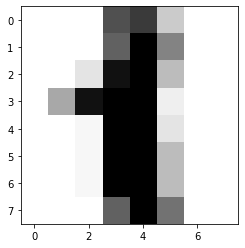

In [43]:
plt.imshow(digits[ 'images'][1],cmap='Greys')

In [ ]:
random_image

311

In [10]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

### training-test split

In [11]:
# Split data into 50% train and 50% test subsets
x_train, x_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.2, shuffle=False
)

## fit logisitic regression

In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='saga', max_iter=100)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

print(f"R² on train set: {logreg.score(x_train, y_train):.3f}")
print(f"R² on test set: {logreg.score(x_test,y_test):.3f}")

R² on train set: 1.000
R² on test set: 0.908


/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Text(0.5, 1.0, 'Prediction: 6')

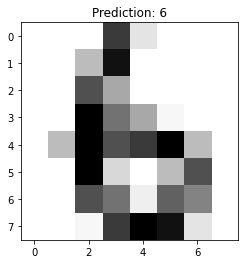

In [74]:
random_image = np.random.choice(len(x_test))

plt.imshow(x_test[random_image].reshape((8, 8)), cmap = "Greys")
plt.title(f"Prediction: {y_pred[random_image]}")

### fit multilayer perceptior

In [177]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(max_iter=100)
MLP.fit(x_train,y_train)
y_pred_MLP = MLP.predict(x_test)

print(f"R² on train set: {MLP.score(x_train, y_train):.3f}")
print(f"R² on test set: {MLP.score(x_test,y_test):.3f}")

R² on train set: 1.000
R² on test set: 0.914


/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(0.5, 1.0, 'Prediction: 6')

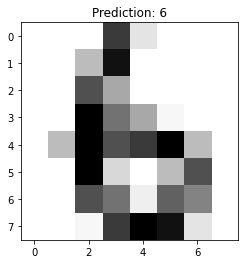

In [178]:
plt.imshow(x_test[random_image].reshape((8, 8)), cmap = "Greys")
plt.title(f"Prediction: {y_pred_MLP[random_image]}")

### import a more interesting dataset
from the keras libarary we can import cifar10


https://www.cs.toronto.edu/~kriz/cifar.html


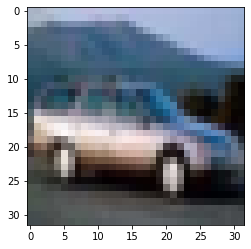

In [179]:
from tensorflow import keras

(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

plt.imshow(X_train[4])

In [180]:
### preprocessing

X_train = X_train / 255.0     
X_train_arr = X_train.reshape(X_train.shape[0], -1) 

X_test = X_test / 255.0
X_test_arr = X_test.reshape(X_test.shape[0], -1)

np.shape(X_train)

(50000, 32, 32, 3)

In [181]:
labels = {0: 'plane',
          1: 'car',
          2: 'bird',
          3: 'cat',
          4: 'deer',
          5: 'dog',
          6: 'frog',
          7: 'horse',
          8: 'ship',
          9: 'truck'
          }

### visualize 5 examples of 5 categories

1.0

0.0

In [248]:
row

3

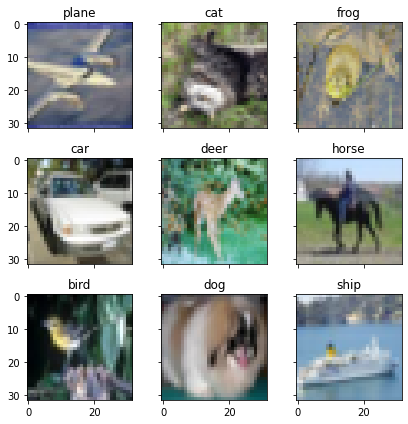

In [264]:
cols = 3
rows = 3

np.random.seed(0)

fig, axs = plt.subplots(cols, rows, figsize = (6, 6), sharex=True, sharey=True,)

for cat in set(Y_train.ravel()):
    row = int(np.floor(cat / rows))
    col = int(np.ceil(cat % cols))
    if row == rows:
        break
    i = np.random.choice(np.where(Y_train.ravel() == cat)[0])
    axs[col, row].imshow(X_train[i], )
    axs[col, row].set_title(f"{labels[cat]}")
    
fig.tight_layout()

## fit multilayer perceptron to the data and evaluate the fit

optional here: confusion matrix

In [259]:
MLP = MLPClassifier(max_iter = 20)
MLP.fit(X_train_arr, Y_train)

/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20)

In [261]:
print(f"R² on train set: {MLP.score(X_train_arr, Y_train):.3f}")
print(f"R² on test set: {MLP.score(X_test_arr, Y_test):.3f}")

R² on train set: 0.416
R² on test set: 0.405


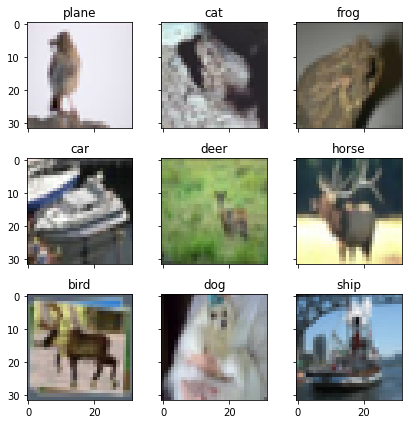

In [267]:
y_test_pred = MLP.predict(X_test_arr)

fig, axs = plt.subplots(cols, rows, figsize = (6, 6), sharex=True, sharey=True,)

for cat in set(y_test_pred.ravel()):
    row = int(np.floor(cat / rows))
    col = int(np.ceil(cat % cols))
    if row == rows:
        break
    i = np.random.choice(np.where(y_test_pred.ravel() == cat)[0])
    axs[col, row].imshow(X_test[i], )
    axs[col, row].set_title(f"{labels[cat]}")
    
fig.tight_layout()

## fit neural network with keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### set up network

In [ ]:
NN_model = Sequential()
NN_model.add(Dense(30 , input_dim=#your dimensions, activation='relu'))
NN_model.add(Dense(10, activation='softmax'))

### compile

In [ ]:
NN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
NN_model.fit(#yourX,yourY, epochs=10, validation_split=0.1)

In [ ]:
_, accuracy = NN_model.evaluate(#your code)


In [ ]:
NN_model.summary()

### fit Convolutional neural network with keras

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:

model_CNN = Sequential()

model_CNN.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=# your dimensions)) 
model_CNN.add(MaxPooling2D(pool_size=2))
model_CNN.add(Flatten())
model_CNN.add(Dense(10, activation='softmax'))

### compile model

In [ ]:
model_CNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### fit model

In [ ]:
model_CNN.fit(#your code, your code, epochs=5, validation_split=0.1)

In [ ]:
_, accuracy = model_CNN.evaluate(# your test data)
print(accuracy)

In [ ]:
Preds=model_CNN.predict(# your data)


### confusion matrix on test set
include stimulus names

explore CNN parameters, and how changing them might improve classification on test set